Mounted at /content/drive
Found 198 files belonging to 2 classes.
Using 159 files for training.
Found 198 files belonging to 2 classes.
Using 39 files for validation.
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 9s/step - accuracy: 0.4740 - auc: 0.4835 - loss: 1.6811 - precision: 0.4740 - recall: 0.4740 - val_accuracy: 0.4359 - val_auc: 0.4740 - val_loss: 0.9860 - val_precision: 0.4359 - val_recall: 0.4359
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5630 - auc: 0.5895 - loss: 0.7294 - precision: 0.5630 - recall: 0.5630 - val_accuracy: 0.5641 - val_auc: 0.7442 - val_loss: 0.6782 - val_precision: 0.5641 - val_recall: 0.5641
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 911ms/step - accuracy: 0.5131 - auc: 0.5741 - loss: 0.6944 - precision: 0.5131 - recall: 0.5131 - val_accuracy: 0.5128 - val_auc: 0.6801 - val_loss: 0.6803 - val_precision: 0.5128 - val_recall: 0.5128
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 820ms/step - accuracy: 0.6364 - auc: 0.7394 - loss: 0.6729 - precision: 0.6364 

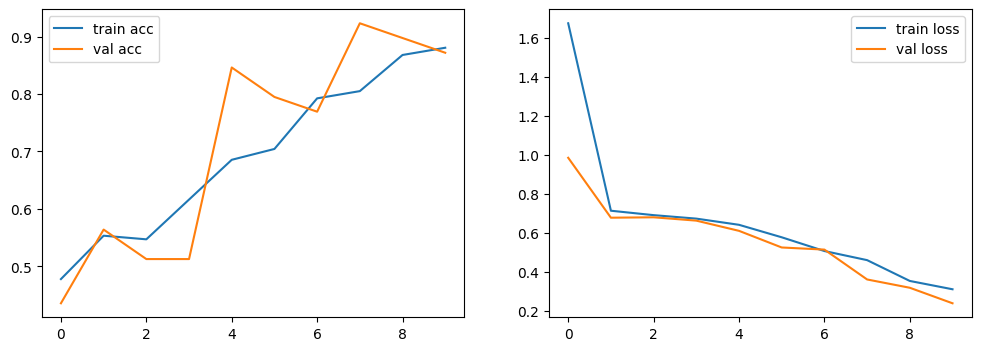

[[14  3]
 [ 2 20]]
              precision    recall  f1-score   support

       np300       0.88      0.82      0.85        17
        p300       0.87      0.91      0.89        22

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39



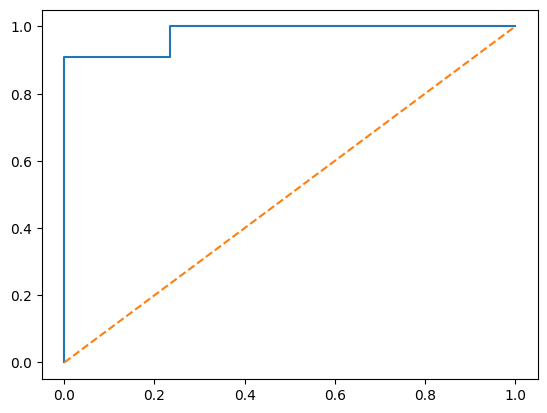

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

DATA_DIR = "/content/drive/MyDrive/tf_images"
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
SEED = 42

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    validation_split=0.2,
    subset="training",
    seed=SEED
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    validation_split=0.2,
    subset="validation",
    seed=SEED
)

train_ds = train_ds.map(lambda x, y: (x/255.0, y))
val_ds   = val_ds.map(lambda x, y: (x/255.0, y))

model = models.Sequential([
    layers.Input(shape=(128,128,3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(train_ds, validation_data=val_ds, epochs=10)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

y_true, y_pred, y_prob = [], [], []

for x, y in val_ds:
    p = model.predict(x, verbose=0)
    y_true.extend(np.argmax(y.numpy(), axis=1))
    y_pred.extend(np.argmax(p, axis=1))
    y_prob.extend(p[:,1])

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=['np300','p300']))

fpr, tpr, _ = roc_curve(y_true, y_prob)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.show()
